In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sympy import symbols, Eq, solve, summation
from sympy.functions import exp

In [5]:
from scipy.optimize import minimize_scalar
import math

In [7]:
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [9]:
def func(x,Nmax,nbar):
    
    Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))
    n = np.exp(-Nmax*x)*(np.exp((Nmax + 1)*x) -(Nmax+1)*np.exp(x) + Nmax)/(np.exp(x) -1)**2
    
    
    return np.abs(nbar - n/Z)

In [10]:
Nmax=14
nbar=3
res = minimize_scalar(func,args=(Nmax,nbar),bounds=(0, 1), method='bounded')

In [11]:
x = res.x

In [12]:
hbar = 1.054571817e-34
kB = 1.380649e-23
omega = 2*np.pi*1.4*10e6
#x = 0.184132
Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))

T = hbar*omega/(kB*x)
T

0.002527075613606284

In [13]:
P = []
for i in range(Nmax+1): #Nmotion=15 but for <n> =3 keep up to i=10
    P.append(np.exp(-i*x)/Z)

In [14]:
sum(P)

1.0

In [23]:
Pn = []
for i in range(Nmax+1):
    Pn.append(np.exp(-i*x)/Z*i)

In [25]:
sum(Pn) #<n>

2.9999994106949863

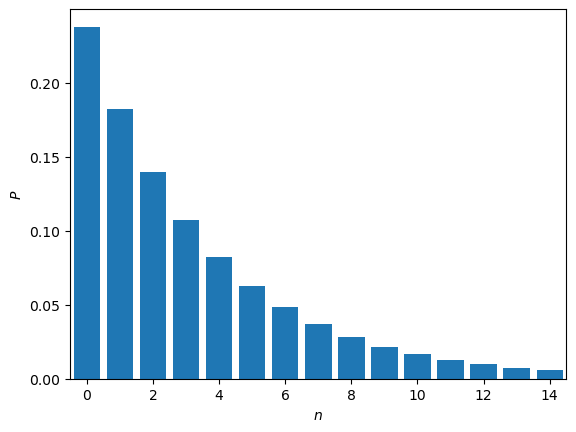

In [27]:
plt.figure()
plt.bar(np.arange(0,Nmax+1),P)
plt.ylabel('$P$')
plt.xlabel('$n$')
plt.xlim(-0.5,Nmax+0.5)
plt.show()

In [29]:
P[-1]

0.005751477788089598

## B = 5G, Δ$_{1,0}$ = 10 ΜHz, Δ$_{1,1}$ = 20.5 ΜHz, Δ$_{1,2}$ = 20 ΜΗz, ω = 1.4 ΜΗz,
## Ω$_{1,0}$ = Ω$_{1,2}$ = 23.5 ΜHz, Ω$_{1,1}$ = 10 ΜΗz, state 7

In [39]:
t = []
n = []
n_div = []
for i in range(Nmax+1):
    t.append(np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 0])
    n.append(np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 1])
    n_div.append(np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:, 0])          

In [41]:
nMC = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC +=np.array(n[i])*P[i]

In [43]:
nMC_dev = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC_dev += np.array(n_div[i])*P[i]
nMC_dev = nMC_dev/np.sqrt(500-1)

In [55]:
pops = []
pops_divs = []
for j in range(12):
    pop = []
    pop_div = []
    for i in range(Nmax+1):
        pop.append(P[i]*np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:,j+2])
        pop_div.append(P[i]*np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:,j+1])
    pop_=np.sum(pop,axis=0)
    pop_div_=np.sum(pop_div,axis=0)
    
    pops.append(pop_)
    pops_divs.append(pop_div_)

pops_divs = pops_divs/np.sqrt(500-1)

In [56]:
plt.rcParams.update({'font.size': 8})

In [57]:
colors = cm.Paired(np.linspace(0,1,12))

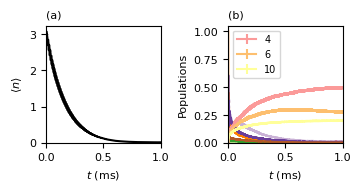

In [91]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(3.5,1.8))

gs = GridSpec(1, 2, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.errorbar(t[0]*1e-3,nMC,yerr = nMC_dev,color='black',ecolor='black')
ax1.set_ylim(0)
ax1.set_xlim(0,1)
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.set_xlabel('$t$ (ms)')



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
for i in range(12):
    ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],color=colors[i])
i=4
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=6
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=10
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
ax3.set_ylabel('Populations')
ax3.set_xlabel('$t$ (ms)')
ax3.set_ylim(0)
ax3.set_xlim(0,1)
ax3.legend(loc='upper left',prop={'size': 7})


plt.savefig("I1_populations.pdf",bbox_inches = "tight")


plt.show()

In [93]:
steady_pops =[2.5219545337697136e-05, 3.5433437140971124e-05, 1.0213891803224638e-05, 4.4020500073060234e-05, 0.7353137395982505, 0.0007520912399441204, 0.03519372248798341, 0.0006316809651755381, 0.0024810290754624363, 0.0009114473078347735, 0.22435672364281736, 0.0002446783081765801]

In [95]:
steady_pops[4]

0.7353137395982505

In [97]:
steady_pops[6]

0.03519372248798341

In [99]:
steady_pops[10]

0.22435672364281736